In [1]:
from google.colab import drive
import numpy as np
import pandas as pd
drive.mount("/content/gdrive")  
!pwd  # show current path 

%cd "/content/gdrive/MyDrive/IA95022"
!ls  # show current directory

Mounted at /content/gdrive
/content
/content/gdrive/MyDrive/IA95022
 bezdekIris.data	      iris.data			'Store Sales'	   Wine
 class_060922_starter.ipynb   iris.names		 train.csv
 DryBeanDataset		     'Modulo 4'			 us2022q2a.csv
 Index			      notebookdc8e90834b.ipynb	 usfirms2022.csv


In [2]:
# Carga de datos
usdata = pd.read_csv('us2022q2a.csv')
usfirms = pd.read_csv('usfirms2022.csv')
# Unimos la información de ambos datasets en un solo dataframe
usfirms.columns = usfirms.columns.str.replace('Ticker', 'firm')
df = pd.merge(usfirms, usdata, on="firm")

In [3]:
df['lprice'] = df.groupby(['firm'])['adjprice'].shift(4)
df['r'] = np.log(df['adjprice']) - np.log(df['lprice'])
df['r2']= np.log(df['adjprice']) - np.log(df.groupby(['firm'])['adjprice'].shift(4))
df.loc['ADT': 'ADTN', ['adjprice', 'lprice', 'r', 'r2']].iloc[85:96,]

,adjprice,lprice,r,r2


In [4]:

df['qdate'] = pd.PeriodIndex(df['q'], freq="Q")

df.set_index(['firm', 'qdate'], drop = True)

df.index
df.columns
df['lprice'] = df.groupby(['firm'])['adjprice'].shift(4)
df[['q', 'adjprice', 'lprice']]
df.loc['ADT': 'ADTN', ['adjprice', 'lprice']].iloc[84:98]



,adjprice,lprice


# ¿Cuántas empresas hay en cada industria?


In [5]:
# Obtenemos el conteo de las industrias utilizando el dataset que solo contiene
# la información de las empresas, basándonos en la columna de su industria
mask = df['q']=='2022q2' 
a = usfirms['Sector NAICS\nlevel 1'][mask].value_counts()

a

Manufacturing                                       17
Finance and Insurance                               10
Professional, Scientific, and Technical Services     5
Information                                          2
Real Estate and Rental and Leasing                   2
Wholesale Trade                                      1
Construction                                         1
Retail Trade                                         1
Mining, Quarrying, and Oil and Gas Extraction        1
Name: Sector NAICS\nlevel 1, dtype: int64

In [6]:
import plotly.express as px


En la gráfica que se muestra a continuación, vemos que la mayor parte de las empresas pertenecer a la categoría de manufactura y finanzas. Es interesante ver que el primer puesto representa más del doble del segundo puesto. 

Esto mismo se repite entre el segundo y tercer puesto, y conforme vamos bajando la diferencia se va haciendo menor.

In [7]:
px.bar(a,title="Cantidad de empresas por categoría")

# For each industry (and for all industries), what can you say about the typical firm size in terms of market value and book value? How much these variables change within each industry? How firm size (in market value) is distributed?

In [8]:
# Calculamos las variables para cada instancia de los datos
df['Book'] = df['totalassets'] - df['totalliabilities']
df['Market'] = df['originalprice'] * df['sharesoutstanding']
df["Ebit"] = df["revenue"] - df["cogs"] - df["sgae"] - df["otheropexp"]
df["OPM"] = df["Ebit"] / df["revenue"]
df["Net income"] = df["Ebit"] - df["incometax"] - df["finexp"]
df["Profit margin"] = df["Net income"] / df["revenue"]

In [23]:
df2 = df.drop(["revenue","cogs","sgae","OPM","stockholderequity","Ebit","sharesoutstanding","Net income","incometax","finexp","longdebt","otheropexp","totalassets","shortdebt","totalliabilities","originalprice","OPM","fiscalmonth","adjprice","extraincome","Sector\nEconomatica","q","Name","firm","Profit margin"], axis=1)
mask = df['q']=='2022q2' 

df2[mask].describe()

,N,year,cto,lprice,r,r2,Book,Market
count,3600.000000,3600.0,3600.0,3417.000000,3402.000000,3402.000000,3.362000e+03,3.548000e+03
mean,1805.693056,2022.0,2.0,64.730187,-0.477583,-0.477583,3.331749e+06,1.095980e+07
std,1042.055705,0.0,0.0,156.302154,0.691950,0.691950,1.386098e+07,6.632062e+07
min,1.000000,2022.0,2.0,0.573000,-3.821337,-3.821337,-1.479100e+07,3.490000e+01
25%,904.750000,2022.0,2.0,12.750000,-0.779820,-0.779820,1.060878e+05,1.907523e+05
50%,1806.500000,2022.0,2.0,29.540112,-0.266420,-0.266420,4.577370e+05,1.105076e+06
75%,2708.250000,2022.0,2.0,67.460000,-0.026795,-0.026795,1.792766e+06,4.607257e+06
max,3608.000000,2022.0,2.0,4973.300000,1.591808,1.591808,2.861430e+08,2.212838e+09


En la siguiente gráfica podemos observar cómo es que existen sectores de mercado que sobresalen mucho del promedio en cuanto al book value, como lo son Finance and Insurance y Other.

Asimismo, podemos notar que en cada sector se observa una distribución diferente de tamaños, ya que la barra no posee un color uniforme.

In [10]:
mask = df['q']=='2022q2' 

px.bar(df[mask], x = 'Sector\nEconomatica', y = 'Book', color ="Sector\nEconomatica",title="Gráfica de book value por cada sector del mercado (Q2 2022)")


In [27]:
df[mask].describe()

,N,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,...,cto,lprice,r,r2,Book,Market,Ebit,OPM,Net income,Profit margin
count,3600.000000,3.355000e+03,3.355000e+03,3.355000e+03,3.355000e+03,3.355000e+03,3.355000e+03,3.355000e+03,3.362000e+03,3.362000e+03,...,3600.0,3417.000000,3402.000000,3402.000000,3.362000e+03,3.548000e+03,3.355000e+03,3354.000000,3.355000e+03,3355.000000
mean,1805.693056,1.441359e+06,8.202441e+05,3.874970e+05,2.311913e+04,-2.077210e+04,1.755578e+04,3.837393e+04,1.600486e+07,1.267312e+07,...,2.0,64.730187,-0.477583,-0.477583,3.331749e+06,1.095980e+07,2.104988e+05,NaN,1.545691e+05,NaN
std,1042.055705,6.286029e+06,4.564278e+06,1.700513e+06,2.078926e+05,2.832093e+05,6.657487e+04,2.154052e+05,1.137581e+08,1.033130e+08,...,0.0,156.302154,0.691950,0.691950,1.386098e+07,6.632062e+07,1.101036e+06,NaN,8.911040e+05,NaN
min,1.000000,-2.527940e+05,-2.443690e+05,-8.566840e+05,-2.296600e+06,-6.466000e+06,-3.150000e+05,-8.360000e+05,1.005000e+03,1.000000e+00,...,2.0,0.573000,-3.821337,-3.821337,-1.479100e+07,3.490000e+01,-3.639000e+06,-inf,-3.314000e+06,-inf
25%,904.750000,2.066700e+04,0.000000e+00,1.092300e+04,0.000000e+00,-4.033000e+03,0.000000e+00,0.000000e+00,3.060870e+05,1.089515e+05,...,2.0,12.750000,-0.779820,-0.779820,1.060878e+05,1.907523e+05,-7.164500e+03,-0.258106,-8.997500e+03,-0.265844
50%,1806.500000,1.506230e+05,2.309200e+04,5.496600e+04,0.000000e+00,-3.955078e-05,5.520000e+02,1.231000e+03,1.584068e+06,9.465275e+05,...,2.0,29.540112,-0.266420,-0.266420,4.577370e+05,1.105076e+06,1.349100e+04,0.068118,7.793000e+03,0.038571
75%,2708.250000,6.993295e+05,2.760000e+05,1.963340e+05,2.700000e+01,4.263770e+02,1.016800e+04,1.539100e+04,6.475676e+06,4.513422e+06,...,2.0,67.460000,-0.026795,-0.026795,1.792766e+06,4.607257e+06,9.709100e+04,0.211226,6.844250e+04,0.150432
max,3608.000000,1.415690e+08,1.068470e+08,5.140300e+07,7.154000e+06,3.572000e+06,1.502000e+06,6.359000e+06,3.841314e+09,3.555171e+09,...,2.0,4973.300000,1.591808,1.591808,2.861430e+08,2.212838e+09,2.307600e+07,inf,1.945200e+07,inf


Hablando del valor de mercado podemos ver un cambio interesante, ya que ahora notamos una menor disparidad entre los sectores de mercado con valores más altos. Se observa que ahora Finance and Insurance representa el tercer sector con valores más altos, contrastando así con su primer puesto en la gráfica anterior.

In [12]:
px.bar(df[mask], x = 'Sector\nEconomatica', y = 'Market', color = 'Sector\nEconomatica', title="Gráfica de market value por cada sector del mercado (Q2 2022)")

In [13]:
df_sorted_market = df.sort_values(by=['Market'], ascending=False)

# For each industry (and for all industries), what can you say about profit margin of firms? show a) descriptive statistics of profit margin and b) plot(s) to illustrate how profit margin changes across industries.

In [14]:
opm_analysis = df[mask].dropna()

Podemos obersvar una tendencia a tener márgenes de ganancia negativos, siendo la industría química la que presenta la mayor cantidad de firmas con márgenes negativos en el último quarter de este año.

In [15]:
px.bar(opm_analysis, x = 'Sector\nEconomatica', y = 'Profit margin', color = 'Sector\nEconomatica', title="Profit Margin por cada sector del mercado (Q2 2022)")

In [16]:
mask = df['q']=='2022q2' 
df_top10_market = df[mask]
df_top10_book = df[mask]
df_sorted_market =  df_top10_market.sort_values('Market', ascending=False).head(10)
df_sorted_book = df_top10_book.sort_values('Book', ascending=False).head(10)




In [29]:
df[mask].median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



N                           1806.5
revenue                   150623.0
cogs                       23092.0
sgae                       54966.0
otheropexp                     0.0
extraincome               -0.00004
finexp                       552.0
incometax                   1231.0
totalassets              1584067.5
totalliabilities          946527.5
shortdebt                   8209.5
longdebt                  227127.0
stockholderequity         457737.0
adjprice                     20.59
originalprice               20.595
sharesoutstanding        54185.049
fiscalmonth                    6.0
year                        2022.0
cto                            2.0
lprice                   29.540112
r                         -0.26642
r2                        -0.26642
qdate                       2022Q2
Book                      457737.0
Market               1105075.91083
Ebit                       13491.0
OPM                       0.068118
Net income                  7793.0
Profit margin       

# A continuación podemos ver el listado de las 10 firmas con un mayor valor de libro.

In [31]:
df_sorted_book[["firm", "Book"]]


,firm,Book
160545,JPM,286143000.0
38153,BAC,269118000.0
14573,GOOGL,255419000.0
67410,C,199626000.0
109530,XOM,184508000.0
314185,WFC,179793000.0
189073,MSFT,166542000.0
64890,CVX,154562000.0
30863,T,135307000.0
15653,AMZN,131402000.0


Resulta muy interesante notar que los valores del top 10 de empresas son considerablemente mayores al valor que se encuentra en la mediana, el cual es de 457737. 

Si comparamos el top 1 contra la mediana, encontramos que el top 1 tiene más de 600 veces el valor de libro que la empresa mediana del dataset.

In [18]:
px.histogram(df[mask]['Market'])


En este caso notamos una tendencia de los datos hacia la izquierda de la grafica, por lo que sabemos que la media no seria un dato representativo. Esto es porque los datos que se encuentran en el extremo derecho están tan distanciados del resto de los datos que terminan subiendo mucho el promedio.
Por lo tanto, en estas situaciones resulta mejor usar la mediana para acompletar datos faltantes, y no la media.

# Y ahora podemos ver el listado de las 10 firmas con mayor market value

In [19]:
df_sorted_market["firm"]

23663      AAPL
189073     MSFT
14573     GOOGL
15653      AMZN
281245     TSLA
298795      UNH
160095      JNJ
187453     META
207635     NVDA
308875        V
Name: firm, dtype: object

Lo mismo ocurre en este caso con la distribución de los datos

In [20]:
px.histogram(df[mask]['Book'])


# 2.2.1.2


Para este punto, intento hallar cuales son las medidas que tienen una mayor relación con las ventas que tiene una firma. 
En este ejercicio es posible identificar una alta correlación con el cogs, el sgae y el stock holder equity.

In [21]:
df_corrs = df.corr()["revenue"]
df_corrs.sort_values( ascending = False)
df_corrs


N                   -0.016230
revenue              1.000000
cogs                 0.931408
sgae                 0.677615
otheropexp           0.333943
extraincome         -0.025453
finexp               0.379055
incometax            0.449182
totalassets          0.323492
totalliabilities     0.275417
shortdebt            0.291061
longdebt             0.378894
stockholderequity    0.595631
adjprice            -0.002771
originalprice        0.151463
sharesoutstanding    0.494759
fiscalmonth          0.003523
year                -0.055865
cto                  0.002382
lprice              -0.002971
r                    0.030197
r2                   0.030197
Book                 0.595626
Market               0.615881
Ebit                 0.589684
OPM                  0.005302
Net income           0.487594
Profit margin        0.005425
Name: revenue, dtype: float64

Calcula el Earnings per share deflated by price

In [32]:
df['EPS'] = df["Net income"] / df["sharesoutstanding"]
df['EPSP'] =  df["EPS"] / df["lprice"]

In [34]:
df[['firm', "EPSP"]].dropna()

,firm,EPSP
4,FLWS,-0.018774
5,FLWS,0.003892
6,FLWS,-0.027780
7,FLWS,0.006818
8,FLWS,0.000495
...,...,...
323810,ZNGA,-0.004300
323811,ZNGA,0.003553
323812,ZNGA,-0.004127
323813,ZNGA,-0.005146


El earnings per share es una medida que nos permite saber que tantas ganancias se están obteniendo por cada acción de la empresa. Sin embargo, esta medición se puede ver afectada por factores como el precio de la acción. Para obtener una métrica más representativa, agregamos el factor del precio al cálculo del EPS, para teminar obteniendo el EPSP.

# Segunda parte

In [ ]:
# Carga de datos
usdata = pd.read_csv('us2022q2a.csv')
usfirms = pd.read_csv('usfirms2022.csv')
# Unimos la información de ambos datasets en un solo dataframe
usfirms.columns = usfirms.columns.str.replace('Ticker', 'firm')
df = pd.merge(usfirms, usdata, on="firm")

# Se obtienen los valores calculados 
df['lprice'] = df.groupby(['firm'])['adjprice'].shift(4)
df['r'] = np.log(df['adjprice']) - np.log(df['lprice'])
df['r2']= np.log(df['adjprice']) - np.log(df.groupby(['firm'])['adjprice'].shift(4))
df["ReturnOnNextQuarter"] = df.groupby(["firm"])["r2"].shift(-1)
df.loc['ADT': 'ADTN', ['adjprice', 'lprice', 'r', 'r2']].iloc[85:96,]
df['qdate'] = pd.PeriodIndex(df['q'], freq="Q")
df.set_index(['firm', 'qdate'], drop = True)
df.index
df.columns
df['lprice'] = df.groupby(['firm'])['adjprice'].shift(4)
df[['q', 'adjprice', 'lprice']]
df.loc['ADT': 'ADTN', ['adjprice', 'lprice']].iloc[84:98]

# Calculamos las variables para cada instancia de los datos
df['Book'] = df['totalassets'] - df['totalliabilities']
df['Market'] = df['originalprice'] * df['sharesoutstanding']
df["Ebit"] = df["revenue"] - df["cogs"] - df["sgae"] - df["otheropexp"]
df["OPM"] = df["Ebit"] / df["revenue"]
df["Net income"] = df["Ebit"] - df["incometax"] - df["finexp"]
df["Profit margin"] = df["Net income"] / df["revenue"]

In [ ]:
df.columns

Index(['firm', 'Name', 'N', 'Class', 'Country\nof Origin', 'Type of Asset',
       'Sector NAICS\nlevel 1', 'Exchange / Src', 'Sector\nEconomatica',
       'Sector NAICS\nlast available', 'partind', 'q', 'revenue', 'cogs',
       'sgae', 'otheropexp', 'extraincome', 'finexp', 'incometax',
       'totalassets', 'totalliabilities', 'shortdebt', 'longdebt',
       'stockholderequity', 'adjprice', 'originalprice', 'sharesoutstanding',
       'fiscalmonth', 'year', 'cto', 'lprice', 'r', 'r2',
       'ReturnOnNextQuarter', 'qdate', 'Book', 'Market', 'Ebit', 'OPM',
       'Net income', 'Profit margin'],
      dtype='object')

# 2.2.2 About statistical modeling


## Financial services: Primer acercamiento

In [ ]:
df.columns

Index(['firm', 'Name', 'N', 'Class', 'Country\nof Origin', 'Type of Asset',
       'Sector NAICS\nlevel 1', 'Exchange / Src', 'Sector\nEconomatica',
       'Sector NAICS\nlast available', 'partind', 'q', 'revenue', 'cogs',
       'sgae', 'otheropexp', 'extraincome', 'finexp', 'incometax',
       'totalassets', 'totalliabilities', 'shortdebt', 'longdebt',
       'stockholderequity', 'adjprice', 'originalprice', 'sharesoutstanding',
       'fiscalmonth', 'year', 'cto', 'lprice', 'r', 'r2',
       'ReturnOnNextQuarter', 'qdate', 'Book', 'Market', 'Ebit', 'OPM',
       'Net income', 'Profit margin'],
      dtype='object')

En la siguiente gráfica podemos ver un panorama general de cómo ha variado históricamente el valor de libro de cada empresa del sector.

In [ ]:
rslt_df = df.loc[df["Sector NAICS\nlevel 1"].isin(['Finance and Insurance', 'Real Estate and Rental and Leasing'  ])]
px.line(rslt_df, x = 'q', y = 'Book', color = "firm", title="Gráfica de book value histórico de cada firma de Finance and Insurance")


## Using your subset of firms that belong to your industry, which factors (variables) might be related to annual stock return one quarter in the future? Select at least 3 factors and briefly explain why you think might be related to stock returns.



A continuación, graficaremos cómo se relacionan las distintas variables con el fin de buscar alguna que pueda tener correlación con el stock return que se tiene

In [ ]:
from scipy.stats.mstats import winsorize

# Seleccionamos solo los valores que nos serán de utilidad en este análisis
df_analysis = rslt_df[['firm','q','r2', 'ReturnOnNextQuarter', 'cogs', 'sgae', 'otheropexp', 'revenue', 'Ebit','OPM', 'Book', 'Market', 'Profit margin']]

# Calculamos las nuevas variables 

df_analysis["OPM"] = df["Ebit"] / df["revenue"]
df_analysis['BookToMarketRatio'] = df['Book'] / df['Market']
df_analysis['ShortFinancialLeverage'] = df["shortdebt"] / df["totalassets"] 
df_analysis['LongFinancialLeverage'] = df["longdebt"] / df["totalassets"] 
df_analysis['OperatingProfitGrowth'] = (df["Ebit"] - df["Ebit"].shift(4)) - 1
df_analysis['SalesAnnualGrowth'] = (df["revenue"] / df["revenue"].shift(4)) - 1 
df_analysis['EPS'] = df["Net income"] / df["sharesoutstanding"]
df_analysis["lprice"] = df["lprice"]
df_analysis['EPSP'] =  df_analysis["EPS"] / df_analysis["lprice"]
df_analysis["EPSP"] = winsorize(df_analysis["EPSP"], limits=[0.0001, 0.02])
df_analysis['Size'] =  df["Market"] 

df_analysis  = df_analysis.replace([np.inf, -np.inf], np.nan).dropna()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [ ]:
def dense_inclusive_pct(x):
    r = x.rank(method='dense') - 1
    return r / r.max() * 100

df_analysis["pct"]=df_analysis.groupby('q').Market.apply(dense_inclusive_pct).astype(int)

df_analysis["small?"] = df_analysis.pct <= 33
df_analysis["small?"] = df_analysis["small?"].astype(int)

df_analysis["medium?"] = (df_analysis.pct <= 66) & (df_analysis.pct > 33) 
df_analysis["medium?"] = df_analysis["medium?"].astype(int)




array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f58b1b40fd0>,
      dtype=object)

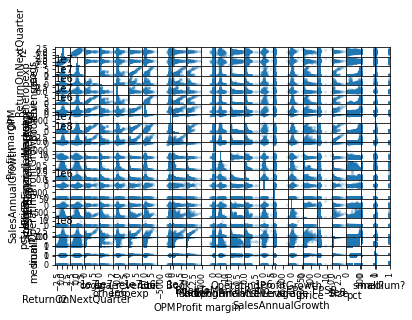

In [ ]:
pd.plotting.scatter_matrix(df_analysis, alpha=0.2)

Vemos que es difícil encontrar alguna variable que parezca tener una correlación. Para verlo numéricamente, imprimiremos los valores de la correlación de pearson

In [ ]:
df_analysis.corr(method="pearson")

,r2,ReturnOnNextQuarter,cogs,sgae,otheropexp,revenue,Ebit,OPM,Book,Market,...,LongFinancialLeverage,OperatingProfitGrowth,SalesAnnualGrowth,EPS,lprice,EPSP,Size,pct,small?,medium?
r2,1.000000,0.730173,0.027581,0.019837,-0.010773,0.034162,0.083665,0.006498,0.039561,0.076572,...,-0.049976,0.143467,-0.008596,0.176711,-0.036305,0.106358,0.076572,0.143229,-0.126598,0.031939
ReturnOnNextQuarter,0.730173,1.000000,0.028170,0.022570,-0.016022,0.034406,0.075487,0.024174,0.033903,0.056796,...,-0.040085,0.142558,0.000388,0.147110,-0.041958,0.077191,0.056796,0.105890,-0.092086,0.020272
cogs,0.027581,0.028170,1.000000,0.270760,0.167693,0.976445,0.797082,0.005107,0.721353,0.721371,...,-0.015691,0.162100,-0.001917,0.143361,0.218662,-0.001982,0.721371,0.274125,-0.129867,-0.115052
sgae,0.019837,0.022570,0.270760,1.000000,0.087333,0.465406,0.326587,0.010644,0.389754,0.252224,...,-0.039755,0.055798,-0.004446,0.138661,0.165167,0.001602,0.252224,0.313796,-0.188403,-0.092601
otheropexp,-0.010773,-0.016022,0.167693,0.087333,1.000000,0.196026,0.101538,0.003092,0.141954,0.079648,...,0.016815,0.024065,-0.001478,-0.033627,0.002793,-0.018466,0.079648,0.085767,-0.056166,-0.028170
revenue,0.034162,0.034406,0.976445,0.465406,0.196026,1.000000,0.830393,0.007576,0.765766,0.736399,...,-0.022496,0.185735,-0.002559,0.178065,0.247057,0.001077,0.736399,0.337099,-0.170604,-0.131726
Ebit,0.083665,0.075487,0.797082,0.326587,0.101538,0.830393,1.000000,0.011609,0.826693,0.834079,...,-0.017268,0.432551,0.000315,0.345125,0.327292,0.035450,0.834079,0.448783,-0.240466,-0.170256
OPM,0.006498,0.024174,0.005107,0.010644,0.003092,0.007576,0.011609,1.000000,0.012627,0.009983,...,0.028837,0.014769,0.000356,0.013428,0.015152,0.006921,0.009983,0.027016,-0.033965,0.014084
Book,0.039561,0.033903,0.721353,0.389754,0.141954,0.765766,0.826693,0.012627,1.000000,0.767049,...,-0.072811,0.194300,-0.004679,0.271630,0.343964,0.006870,0.767049,0.534012,-0.296592,-0.201084
Market,0.076572,0.056796,0.721371,0.252224,0.079648,0.736399,0.834079,0.009983,0.767049,1.000000,...,0.029505,0.227952,-0.003907,0.219519,0.450134,-0.003560,1.000000,0.470544,-0.247540,-0.182304


Vemos que los valores de correlación son bastante bajos. Sin embargo, existen algunas variables que presentan una correlación con una magnitud superior a 0.1, lo cual nos hace considerarlas como candidatas a ser variables descriptivas en nuestra modelación.

In [ ]:
df_analysis.describe()

,r2,ReturnOnNextQuarter,cogs,sgae,otheropexp,revenue,Ebit,OPM,Book,Market,...,LongFinancialLeverage,OperatingProfitGrowth,SalesAnnualGrowth,EPS,lprice,EPSP,Size,pct,small?,medium?
count,6917.000000,6917.000000,6.917000e+03,6.917000e+03,6.917000e+03,6.917000e+03,6.917000e+03,6917.000000,6.917000e+03,6.917000e+03,...,6917.000000,6.917000e+03,6917.000000,6917.000000,6917.000000,6917.000000,6.917000e+03,6917.000000,6917.000000,6917.000000
mean,0.103787,0.095197,8.248947e+05,4.293181e+05,1.594815e+04,1.424486e+06,1.543251e+05,-2.289200,2.994692e+06,8.429735e+06,...,0.240844,1.897200e+04,5.320753,0.758481,44.307671,0.023404,8.429735e+06,49.527975,0.341767,0.326876
std,0.452571,0.460662,4.320609e+06,1.045863e+06,1.375631e+05,5.081526e+06,4.202509e+05,88.720571,6.496296e+06,2.309750e+07,...,0.247815,1.919406e+05,456.109635,1.859465,71.939343,0.261274,2.309750e+07,29.241688,0.474336,0.469105
min,-3.458085,-3.534346,-1.213960e+05,-1.221000e+06,-1.389770e+06,-1.469086e+06,-2.159750e+06,-6730.400000,-5.425147e+06,1.545884e+03,...,0.000000,-3.263001e+06,-2914.393204,-17.203928,0.197713,-2.871330,1.545884e+03,0.000000,0.000000,0.000000
25%,-0.109901,-0.119137,0.000000e+00,2.654400e+04,0.000000e+00,7.245900e+04,5.953000e+03,0.057494,2.250490e+05,6.194309e+05,...,0.012438,-3.880000e+03,-0.012846,0.080257,11.230286,0.003717,6.194309e+05,24.000000,0.000000,0.000000
50%,0.125468,0.119049,0.000000e+00,1.202070e+05,0.000000e+00,2.644140e+05,4.281400e+04,0.169882,8.311170e+05,2.193342e+06,...,0.176058,3.496000e+03,0.093302,0.410007,22.453875,0.016189,2.193342e+06,50.000000,0.000000,0.000000
75%,0.342088,0.335510,1.041610e+05,3.754560e+05,0.000000e+00,8.008000e+05,1.375020e+05,0.330556,2.393000e+06,6.458285e+06,...,0.399747,2.346300e+04,0.233741,0.906733,44.808088,0.033326,6.458285e+06,75.000000,1.000000,1.000000
max,3.417378,3.417378,7.319900e+07,2.031020e+07,3.486000e+06,8.014900e+07,9.241000e+06,588.077670,7.612800e+07,4.798303e+08,...,2.972546,5.688652e+06,37821.000000,50.837204,836.550000,16.504122,4.798303e+08,100.000000,1.000000,1.000000


In [ ]:
px.histogram(df_analysis['Book'])

Vemos que los datos se encuentran altamente agrupados a la izquierda, esto es porque hay valores muy extremos que rompen con lo "normal". 



In [ ]:
q2_2022 = df['q']=='2022q2' 

### OPM

In [ ]:
px.histogram(df_analysis['OPM'])

Para el OPM, podemos ver que los valores extremos se encuentran agrupados a la izquierda, algo bastante curioso considerando que en la mayoría de variables este tailoring se observa con mayor intensidad del lado derecho. 

Esta variable puede estar relacionada  con el retorno porque directamente representa una ganancia para la firma. Sin embargo, obtener retornos de una acción no solo dependerá de si la empresa tiene un buen margen de ganancias o no, por lo tanto es importante contemplar más variables en nuestro modelo.

In [ ]:
df_analysis["OPM"].describe()

count    6917.000000
mean       -2.289200
std        88.720571
min     -6730.400000
25%         0.057494
50%         0.169882
75%         0.330556
max       588.077670
Name: OPM, dtype: float64

In [ ]:
px.scatter(df_analysis, x = 'ReturnOnNextQuarter', y = 'OPM', color = 'firm', title = "Return vs OPM (Q2 2022)")

Con la gráfica de return vs OPM podemos observar que de manera general los datos presentan una ligera tenendecia positiva, aunque también vemos que existen algunos datos que parecen no seguir esta tendencia.

### Sales Annual Growth

In [ ]:
px.histogram(df_analysis['SalesAnnualGrowth'])

Para el Sales Annual Growth notamos que aún tenemos los datos agrupados a la izquierda.

Esta métrica nos permite saber qué tanto crecieron las ventas de una firma durante el año en cuestión. Si bien es una variable que nos habla positivamente de una empresa, es posible que esta variable no tenga tanto impacto en los retornos de la acción.


In [ ]:
df_analysis["SalesAnnualGrowth"].describe()

count     6917.000000
mean         5.320753
std        456.109635
min      -2914.393204
25%         -0.012846
50%          0.093302
75%          0.233741
max      37821.000000
Name: SalesAnnualGrowth, dtype: float64

In [ ]:
px.scatter(df_analysis, x = 'ReturnOnNextQuarter', y = 'SalesAnnualGrowth', color = 'firm', title = "Return vs Sales Annual Growth (Q2 2022)")

En este caso observamos también una tendencia positiva, sin embargo esta se presenta de una forma más sutl en la mayoría de los datos presentes. 

### Long Financial Leverage	

In [ ]:
px.histogram(df_analysis['LongFinancialLeverage'])

Para el long financial leverage observamos que tenemos un tailoring evidente, con la mayoría de los datos cargados a la izquierda. 

Sabemos que el financial leverage es como tal un préstamo que tiene la firma para potenciar su crecimiento, por lo que al ser un préstamo suele traducirse al pago de intereses y a posibles pérdidas si el proyecto no tiene el impacto esperado. Utilizar capital ajeno siempre representa un riesgo mayor, ya que el límite de perdidas no es solo el total del capital, si no que es el total del capital más la deuda generada en intereses por el capital.

In [ ]:
df_analysis["LongFinancialLeverage"].describe()

count    6917.000000
mean        0.240844
std         0.247815
min         0.000000
25%         0.012438
50%         0.176058
75%         0.399747
max         2.972546
Name: LongFinancialLeverage, dtype: float64

In [ ]:
px.scatter(df_analysis, x = 'ReturnOnNextQuarter', y = 'LongFinancialLeverage', color = 'firm', title = "Return vs LongFinancialLeverage (Q2 2022")

Notamos que hay un comportamiento algo irregular, pero de manera general se logra percibir una tendencia negativa al enfocarnos en el comportamiento de cada firma en particular. En los valores más bajos de retornos encontramos por lo general un valor más alto de la deuda.

### Análisis de multicolinearidad

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()

df_vif  = df_analysis[["ReturnOnNextQuarter","EPSP","OPM", "SalesAnnualGrowth", "LongFinancialLeverage"]]

vif_data["feature"] = df_vif.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i)
                          for i in range(len(df_vif.columns))]

print(vif_data)

                 feature       VIF
0    ReturnOnNextQuarter  1.021699
1                   EPSP  1.009878
2                    OPM  1.000349
3      SalesAnnualGrowth  1.000824
4  LongFinancialLeverage  1.013173


## Design and run a multiple regression model to examine whether your selected factors and earnings per share deflated by price can explain/predict annual stock returns. You have to control for industry and firm size. To control for these variables you have to include them as extra independent variables in the model

In [ ]:
import statsmodels.api as sm

#add constant to predictor variables
X = df_analysis[["EPSP","OPM", "SalesAnnualGrowth", "LongFinancialLeverage", "small?", "medium?"]]
x = sm.add_constant(X)
y = df_analysis["ReturnOnNextQuarter"]
#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     ReturnOnNextQuarter   R-squared:                       0.018
Model:                             OLS   Adj. R-squared:                  0.017
Method:                  Least Squares   F-statistic:                     20.85
Date:                 Sat, 10 Sep 2022   Prob (F-statistic):           2.32e-24
Time:                         04:33:14   Log-Likelihood:                -4390.9
No. Observations:                 6917   AIC:                             8796.
Df Residuals:                     6910   BIC:                             8844.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



## Interpret your model



Antes de hacer la interpretación final, vamos a droppear la variable Sales Annual Growth, ya que vemos que tiene un bajísimo poder explicativo. Al tener un P value de 0.958 prácticamente nos estaremos equivocando siempre que utilizemos esta variable para prredecir el comportamiento de los retornos futuros. 


In [ ]:

#add constant to predictor variables
X = df_analysis[["EPSP", "OPM", "LongFinancialLeverage", "small?", "medium?"]]
x = sm.add_constant(X)
y = df_analysis["ReturnOnNextQuarter"]
#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     ReturnOnNextQuarter   R-squared:                       0.018
Model:                             OLS   Adj. R-squared:                  0.017
Method:                  Least Squares   F-statistic:                     25.03
Date:                 Sat, 10 Sep 2022   Prob (F-statistic):           4.39e-25
Time:                         04:33:15   Log-Likelihood:                -4390.9
No. Observations:                 6917   AIC:                             8794.
Df Residuals:                     6911   BIC:                             8835.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



Analizando el resultado final de nuestro modelo, podemos notar que el EPSP está relacionado de forma positiva con los retornos del próximo trimestre. Tiene el segundo mayor poder explicativo de todas las variables, estando solo por detrás del intercepto.
Además de que es la segunda variable que tiene una mayor magnitud de coeficiente, lo cual nos indica que el cambio en los retornos futuros será mayor conforme exista un cambio en una unidad de EPSP. Esta magnitud significa que cada que veamos un aumento de + 1 en el EPSP, el retorno crecerá 0.1315 .

También se puede observar que el OPM tiene una relación positiva y significativa con los retornos futuros. En este caso particular vemos que el P value es de 0.07, sin embargo, recordemos que las propiedades de las variables que estamos estudiando nos permiten solamente considerar el p value de un solo lado, lo que nos dejaría con un valor de 0.035 el cual representa un margen de confianza del 96.5%.
Algo más a resaltar de esta relación es que es de baja magnitud, por lo que los cambios en el OPM impactan muy sutilmente en los retornos del próximo periodo.
En este caso particular, vemos que por cada + 1 que haya en el OPM, tendremos un crecimiento del .001 en el valor del retorno del próximo periodo.

Hablando del long financial leverage, podemos obervar una relación negativa con los retornos del próximo trimestre. Esta relación es significativa y su magnitud es superior a la del OPM, por lo que los cambios en el Long Financial Leverage se ven reflejados en mayor medida en el valor de los retornos futuros; observamos que conforme la deuda a largo plazo es mayor, existe un decrecimiento en los retornos del siguiente quarter. Cuando tenemos un incremento de + 1 en el long financial leverage, veremos un decrecimiento de -0.846 en el valor del retorno del next quarter.


Hablando de las variables categóricas, para este modelo se tomó como base a las empresas de tamño grande. Podemos ver que tanto la variable small como medium representan relaciones significativas y negativas, y conforme menor es el tamaño de una empresa notamos que el coeficiente incrementa su magnitud.

Mientras más negativo sea este coeficiente, los retornos serán menores, ya que estos coeficientes modifican directamente al intercepto de nuestro modelo y solamente se aplicarán cuando se cumple la condición de ser una empresa pequeña o mediana respectivamente. 
Por lo tanto, interpretamos que las firmas de mayor tamaño están teniendo mayores retornos, y conforme más pequeña sea la empresa los retornos del próximo periodo tienen a ser menores.
Las magnitudes de estos coeficientes dummies nos dicen qué tanto se va a modificar el intercepto del grupo base (empresas grandes) cuando tengamos una empresa mediana o chica respectivamente. Su signo nos dirá si este intercepto crecerá o decrecerá.

También podemos ver de forma general que las variables que están presentes en el modelo tienen una relación significante, ninguna tiene un p value superior a 0.05, por lo que no hay ninguna variable con la que nos estemos equivocando en más del 5% de las veces. Esta significancia es gracias a que en la ejecución que hicimos previamente del modelo encontramos una variable que tenía un poder explicativo muy bajo y la retiramos del modelo. 